# Satellite Climatology: Remote Sensing of a Changing Climate: Exercises - 0
## Xarray and spatial data

Hendrik Andersen, contact: hendrik.andersen@kit.edu

In remote sensing projects, you typically have to work with spatial data. Xarray is a package that uses all pandas functionality (e.g. working intelligently with time series) and extends this to multidimensional (spatial) data, which makes working with such data very efficient. To do this, xarray works based on xarray.Datasets or xarray.DataArrays (compared to the dataframes of pandas). This script is intended to show you general techniques of working with xarray. For the official documentation of xarray check out https://docs.xarray.dev/en/stable/index.html

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import xarray as xr
# Load exemplary data set
airtemps = xr.tutorial.open_dataset('air_temperature')

__Short Information__

In xarray, data is typically stored in data sets (xarray.Dataset). These data sets can contain one or more variables, which are stored in individual xarray.DataArrays. This example data set (airtemps) contains one variable (air):

airtemps.air
setssets
<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
        
This DataArray contains 2920 time steps, along 25 latitudinal and 53 longitudinal points. With such DataArrays, one can work very similarly as within Pandas (functionality for calculations and plots).
As such, the command 

airtemps.air.mean(dim='time').plot()    

creates a spatial visualization of the average temperature (the averaging occurs here along the temporal axis, as defined by the argument dim='time'). Actually, behind such a Dataarray, a numpy.array is hidden, which can be directly accessed with '.values'.

airtemps.air.values

This way, one can (if so desired) work with the standard numpy syntax.

### Data can also be stored and loaded with xarray, typically as netcdf (.nc) files, which is a standard filetype in geosciences.

airtemps.to_netcdf('airtemps.nc') # save data

airtemps = xr.open_dataset('airtemps.nc') # load data

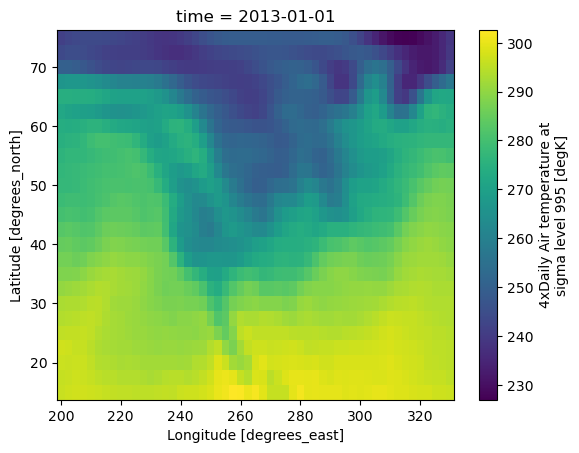

In [5]:
airtemps.air.isel(time=0).plot(); plt.show() # plot of the first time step (isel: integer position of the value along the defined axis)

As you can see, the default setting in xarray automatically looks in the metadata of the file to correctly label the axes and colorbar of plots and creates a title. For more information on plotting in xarray, check out https://docs.xarray.dev/en/stable/user-guide/plotting.html

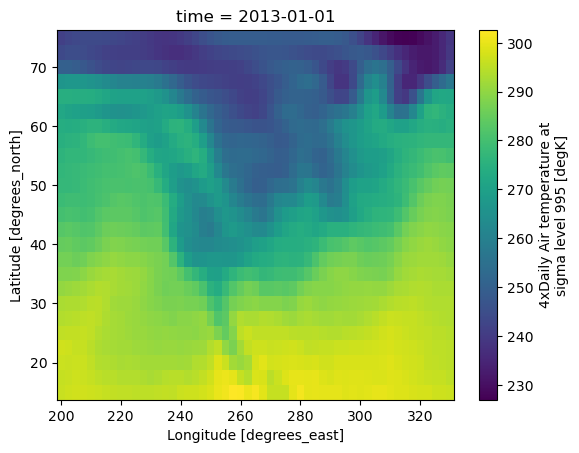

In [6]:
# You can also select the same time using the label of the specific time step.
airtemps.air.sel(time='2013-01-01T00').plot(); plt.show() 

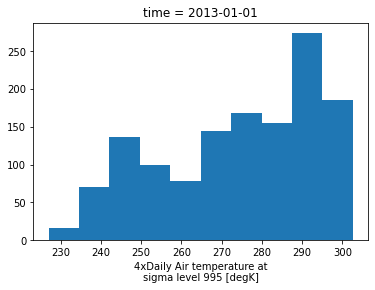

In [4]:
airtemps.air.sel(time='2013-01-01T00').plot.hist(); plt.show() # histogram of all temperatures on this day

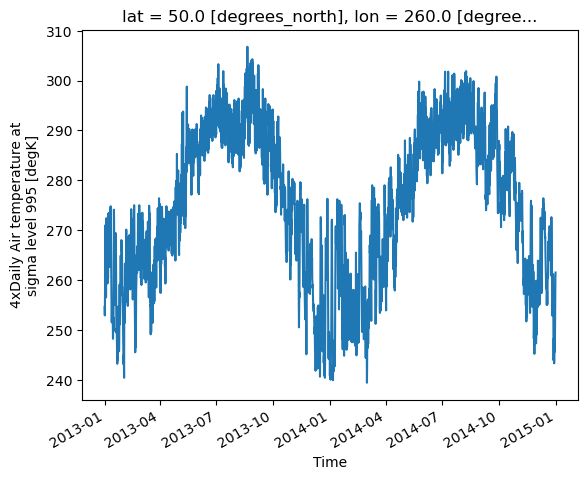

In [7]:
airtemps.air.sel(lon=260,lat=50).plot(); plt.show() # Selection and visualization of the time series of a specific location

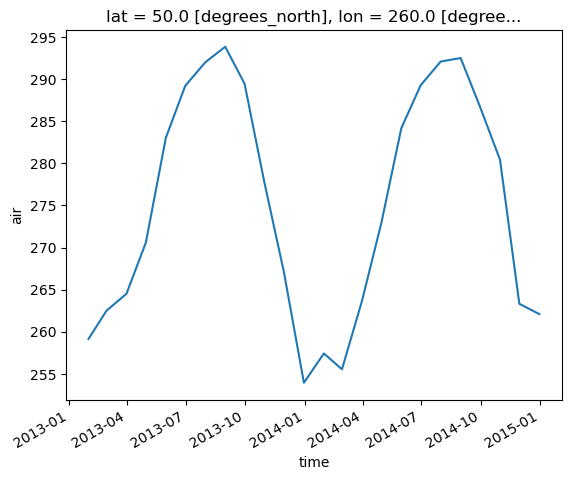

In [9]:
# plot monthly maximum temperatures
airtemps.air.sel(lon=260,lat=50).resample(time='1m').mean().plot(); plt.show() 
# > First, you select the pixel, resample it to monthly, calculate the mean of the resampled data, and then plot it. 

In [7]:
airtemps.air.sel(lon=360-122.335167,lat=47.608013,method='nearest').mean() # Average temperature for closest pixel to Seattle

<xarray.DataArray 'air' ()>
array(283.39096, dtype=float32)
Coordinates:
    lat      float32 47.5
    lon      float32 237.5

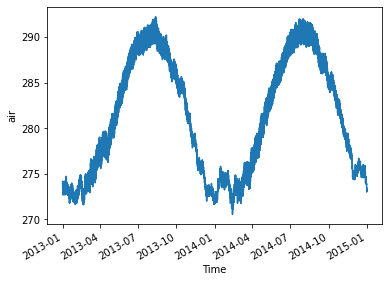

In [8]:
airtemps.air.mean(dim=['lon','lat']).plot(); plt.show() # Averaging along two axes (here spatial domain mean)

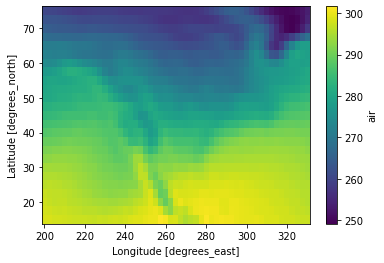

In [9]:
airtemps.air.mean(dim='time').plot(); plt.show() # average over the entire time period

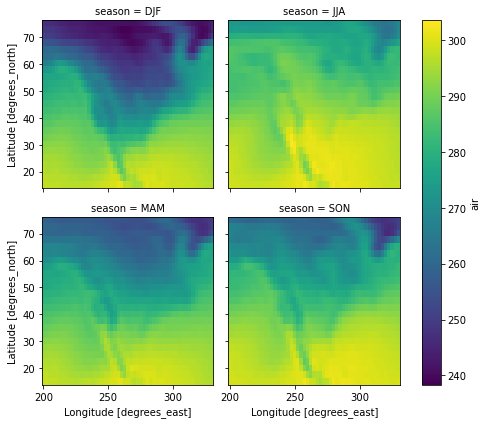

In [10]:
# try to understand what happens here:
airtemps.air.groupby('time.season').mean(dim='time').plot.imshow(col='season', col_wrap = 2)

### Plotting maps
In python different packages exist that enable plotting data on maps (e.g. cartopy, basemap). To do this, coordinates are required, and a projection needs to be defined.
Cartopy is able to intelligently interpret coordinates stored within a xarray data set. For examples how this can be done with basemap, check out: 
https://matplotlib.org/basemap/users/examples.html 

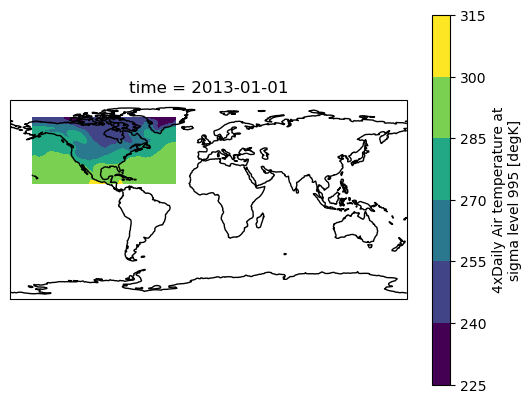

In [21]:
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
airtemps.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines(); plt.show()

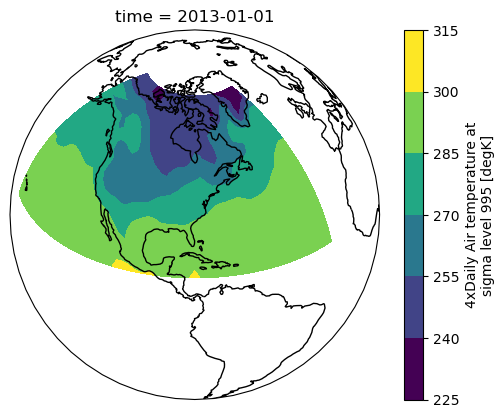

In [11]:
# Center map on relevant region
ax = plt.axes(projection=ccrs.Orthographic(-80, 35)) # Zentrum definieren 
airtemps.air.isel(time=0).plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines(); plt.show()

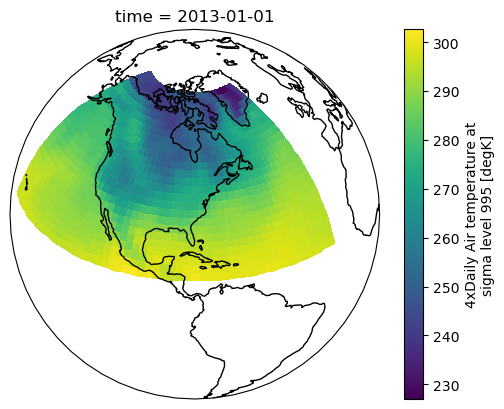

In [12]:
# A different plotting tool (pcolormesh vs. contourf)
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
airtemps.air.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree());
ax.set_global(); ax.coastlines(); plt.show()

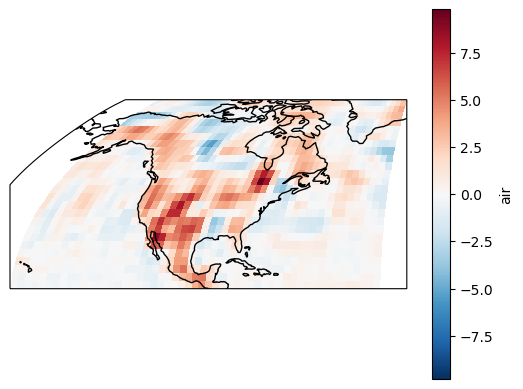

In [15]:
# A different projection
ax = plt.axes(projection=ccrs.Robinson())
(airtemps.air.isel(time=0)-airtemps.air.isel(time=1)).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(); plt.show()

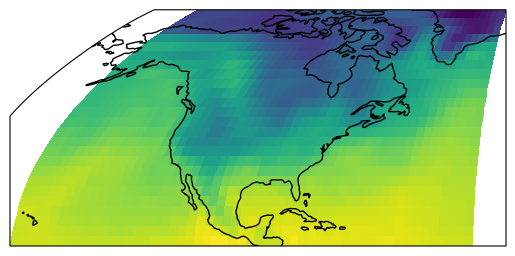

In [20]:
# A different projection
ax = plt.axes(projection=ccrs.Robinson())
ax.pcolormesh(airtemps.lon, airtemps.lat, airtemps.air.isel(time=0), transform=ccrs.PlateCarree());
ax.coastlines(); plt.show()